In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-redmi-fuel-band-record-tracker-fitbit-dataset/Activity_Dataset_V1.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv("../input/my-redmi-fuel-band-record-tracker-fitbit-dataset/Activity_Dataset_V1.csv")

In [5]:
print(data.shape)
print(data.dtypes)
print(data.isna().sum())
print("_" * 100)
print(data.isna().sum().sum())

(1000, 21)
Unnamed: 0          int64
activity_day       object
workout_type       object
distance          float64
time                int64
calories            int64
total_steps       float64
avg_speed         float64
avg_cadence       float64
max_cadence       float64
avg_pace           object
max_pace           object
min_pace           object
avg_heart_rate    float64
max_heart_rate    float64
min_heart_rate      int64
vo2_max(%)          int64
aerobic(%)          int64
anaerobic(%)        int64
intensive(%)        int64
light(%)            int64
dtype: object
Unnamed: 0          0
activity_day        0
workout_type        0
distance            0
time                0
calories            0
total_steps       446
avg_speed           0
avg_cadence         0
max_cadence         0
avg_pace          446
max_pace          446
min_pace          446
avg_heart_rate      0
max_heart_rate      0
min_heart_rate      0
vo2_max(%)          0
aerobic(%)          0
anaerobic(%)        0
intensive(%

In [6]:
data["total_steps"].fillna(data["total_steps"].mean(), inplace=True)
print(data.isna().sum())

Unnamed: 0          0
activity_day        0
workout_type        0
distance            0
time                0
calories            0
total_steps         0
avg_speed           0
avg_cadence         0
max_cadence         0
avg_pace          446
max_pace          446
min_pace          446
avg_heart_rate      0
max_heart_rate      0
min_heart_rate      0
vo2_max(%)          0
aerobic(%)          0
anaerobic(%)        0
intensive(%)        0
light(%)            0
dtype: int64


In [7]:
print(data[["avg_pace","max_pace","min_pace"]].head(10))

  avg_pace max_pace min_pace
0      NaN      NaN      NaN
1      NaN      NaN      NaN
2      NaN      NaN      NaN
3    07:58    28:58    07:58
4      NaN      NaN      NaN
5      NaN      NaN      NaN
6      NaN      NaN      NaN
7    06:44    27:44    06:15
8    06:48    25:50    06:20
9      NaN      NaN      NaN


In [8]:
change = ["avg_pace","max_pace","min_pace","activity_day","workout_type"]
for x in change:
    La = LabelEncoder()
    data[x] = La.fit_transform(data[x])
    
print(data.isna().sum())
print(data.dtypes)
print(data[["avg_pace","max_pace","min_pace"]].head())

Unnamed: 0        0
activity_day      0
workout_type      0
distance          0
time              0
calories          0
total_steps       0
avg_speed         0
avg_cadence       0
max_cadence       0
avg_pace          0
max_pace          0
min_pace          0
avg_heart_rate    0
max_heart_rate    0
min_heart_rate    0
vo2_max(%)        0
aerobic(%)        0
anaerobic(%)      0
intensive(%)      0
light(%)          0
dtype: int64
Unnamed: 0          int64
activity_day        int64
workout_type        int64
distance          float64
time                int64
calories            int64
total_steps       float64
avg_speed         float64
avg_cadence       float64
max_cadence       float64
avg_pace            int64
max_pace            int64
min_pace            int64
avg_heart_rate    float64
max_heart_rate    float64
min_heart_rate      int64
vo2_max(%)          int64
aerobic(%)          int64
anaerobic(%)        int64
intensive(%)        int64
light(%)            int64
dtype: object
   avg_

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

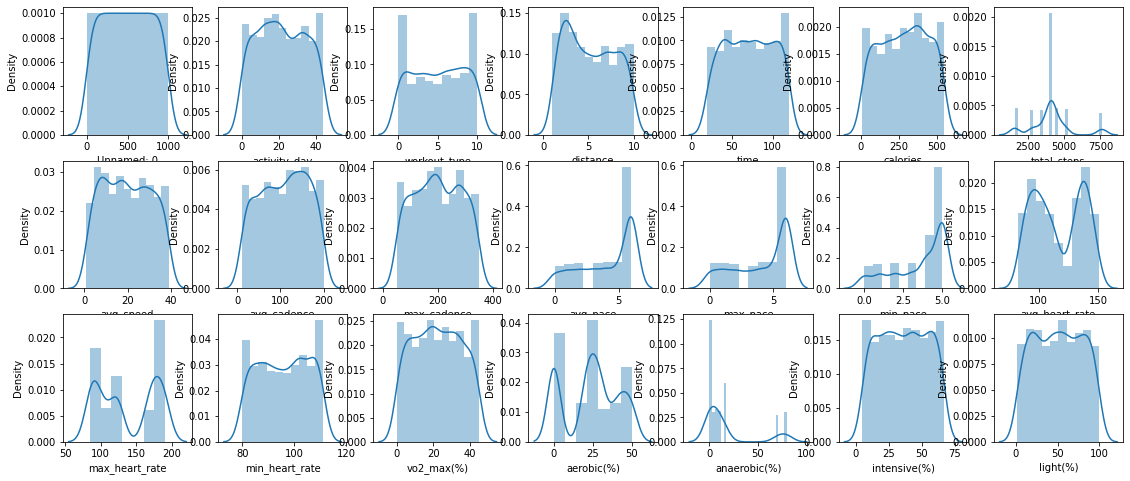

In [9]:
plt.figure(figsize=(19,8))
for (x,y) in zip(data.columns.values,range(data.shape[1])):
    plt.subplot(3,7,y+1)
    sns.distplot(data[x])
plt.show()

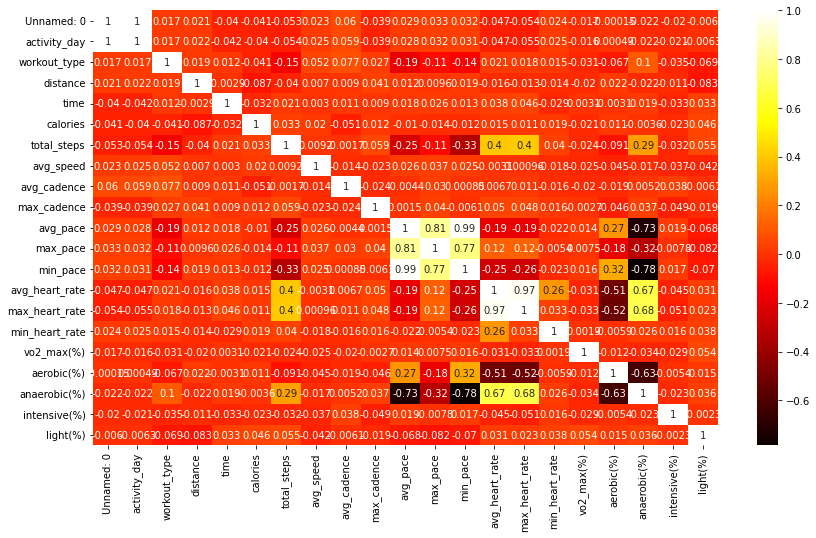

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="hot")
plt.show()

In [11]:
for x in data.columns.values:
    print(x)
    print(data[x].value_counts())
    print("_" * 100)

Unnamed: 0
0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: Unnamed: 0, Length: 1000, dtype: int64
____________________________________________________________________________________________________
activity_day
21    32
12    31
13    30
34    30
19    29
0     28
31    28
37    27
32    27
18    26
8     25
41    25
16    25
24    24
4     24
1     23
39    23
22    23
17    23
2     23
10    22
42    22
5     22
7     22
44    22
26    21
14    21
3     21
11    21
25    20
20    19
29    19
40    18
35    18
33    18
15    18
30    18
28    18
6     17
23    17
38    17
27    17
43    17
9     16
36    13
Name: activity_day, dtype: int64
____________________________________________________________________________________________________
workout_type
10    98
8     98
1     96
6     94
9     94
0     93
3     91
7     90
4     85
5     81
2     80
Name: workout_type, dtype: int64
_______________________________________________

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

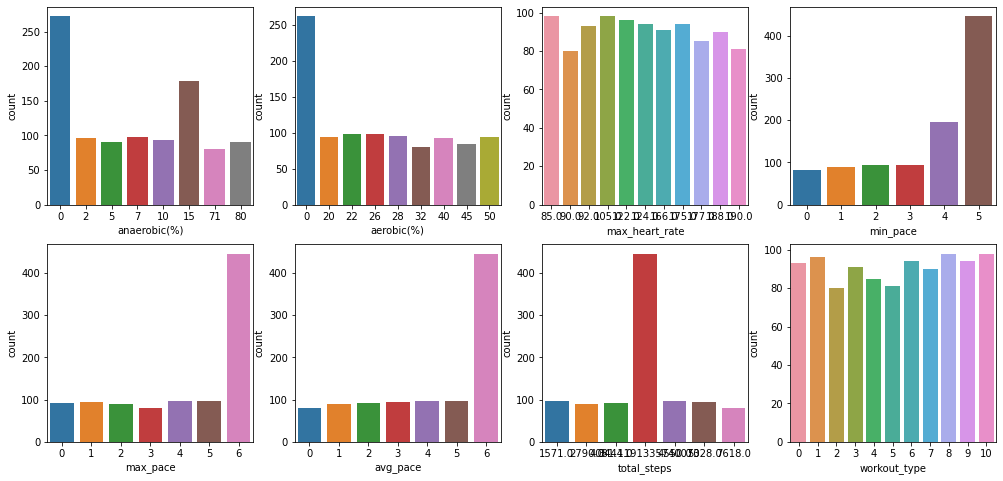

In [12]:
col = ["anaerobic(%)", "aerobic(%)","max_heart_rate","min_pace","max_pace","avg_pace","total_steps","workout_type"]

plt.figure(figsize=(17,8))
for x,y in zip(col,range(len(col))):
    plt.subplot(2,4,y+1)
    sns.countplot(data[x])
plt.show()

In [13]:
print(data[["calories"]].head(10))
print(data[["calories"]].describe())

   calories
0       123
1        55
2        33
3        82
4       131
5       144
6       378
7       430
8       465
9        99
          calories
count  1000.000000
mean    286.310000
std     156.278511
min      10.000000
25%     155.750000
50%     290.500000
75%     415.250000
max     550.000000


In [14]:
data["calories_classes"] = 1
data.loc[data["calories"] > 275, "calories_classes"] = 2 
print(data["calories_classes"].value_counts())

2    530
1    470
Name: calories_classes, dtype: int64


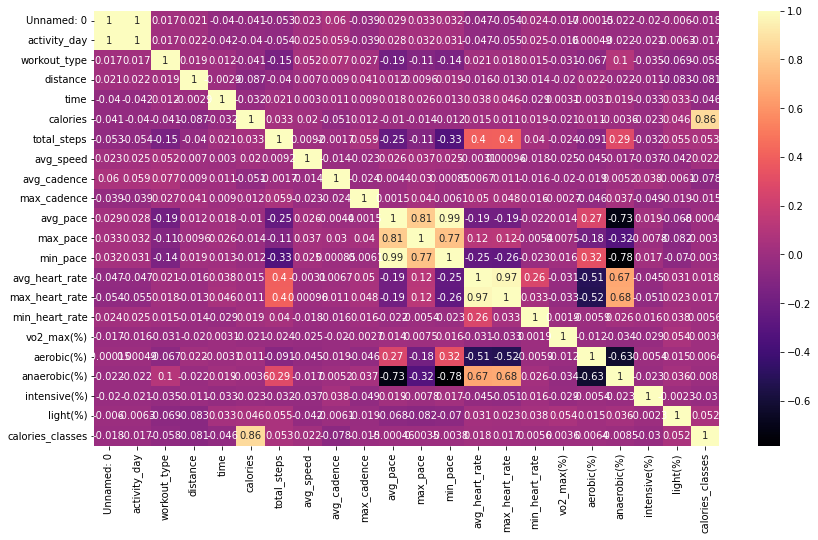

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="magma")
plt.show()

In [16]:
x = data.drop("calories_classes", axis=1)
y = data["calories_classes"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle =True)
print(X_train.shape)

(800, 21)


In [17]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

print("_"*100)
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))
print(DT.feature_importances_)
print("_"*100)
y_pred = DT.predict(X_test)

____________________________________________________________________________________________________
1.0
1.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
____________________________________________________________________________________________________


[[ 93   0]
 [  0 107]]


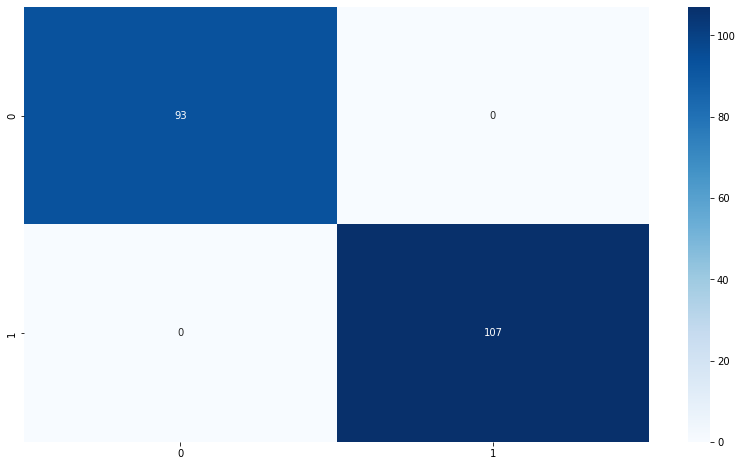

In [18]:
# confusion_matrix
plt.figure(figsize=(14,8))
Cm = confusion_matrix(y_test,y_pred)
print(Cm)
sns.heatmap(Cm,annot=True, fmt="d", cmap="Blues")
plt.show()

In [19]:
# The autput result
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
# result.to_csv("The autput.csv",index=False)